IMPORTS

In [17]:
import pandas as pd
pd.option_context('display.max_rows', None, 'display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import sklearn.linear_model as lm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from itertools import chain, combinations
import warnings
warnings.filterwarnings(action='ignore')
sns.set_style('darkgrid')

%matplotlib inline

DATA

In [18]:
df = pd.read_csv('data/kc_house_data.csv', index_col=0) # (30155,25), 3 duplicated entries
print(f"Duplicates found and removed: * {df.loc[df.duplicated()].shape[0]} *")
df.drop_duplicates(inplace=True)
display(df.head())
display(df.tail())
df.info()

Duplicates found and removed: * 3 *


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908
9557800100,4/29/2022,500000.0,3,1.5,1200,11058,1.0,NO,NO,NO,...,PUBLIC,1200,0,420,0,1965,0,"18615 7th Avenue South, Burien, Washington 981...",47.435840,-122.32634


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30152 entries, 7399300360 to 9557800100
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30152 non-null  object 
 1   price          30152 non-null  float64
 2   bedrooms       30152 non-null  int64  
 3   bathrooms      30152 non-null  float64
 4   sqft_living    30152 non-null  int64  
 5   sqft_lot       30152 non-null  int64  
 6   floors         30152 non-null  float64
 7   waterfront     30152 non-null  object 
 8   greenbelt      30152 non-null  object 
 9   nuisance       30152 non-null  object 
 10  view           30152 non-null  object 
 11  condition      30152 non-null  object 
 12  grade          30152 non-null  object 
 13  heat_source    30120 non-null  object 
 14  sewer_system   30138 non-null  object 
 15  sqft_above     30152 non-null  int64  
 16  sqft_basement  30152 non-null  int64  
 17  sqft_garage    30152 non-null  int64

# EDA

Column Names and Descriptions for King County Data Set

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

### Heatmap

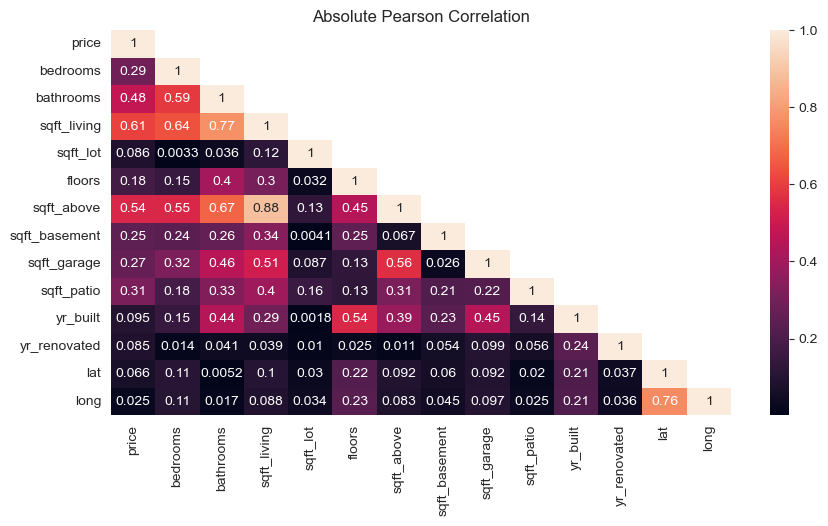

numeric abs(correlation) order: 
sqft_living      0.609931
sqft_above       0.540046
bathrooms        0.481199
sqft_patio       0.313629
bedrooms         0.290028
sqft_garage      0.265272
sqft_basement    0.245506
floors           0.179625
yr_built         0.095441
sqft_lot         0.086046
yr_renovated     0.085081
lat              0.066004
long             0.024826
Name: price, dtype: float64


In [23]:
corr_df = numeric_df.corr().abs()

fig, ax = plt.subplots(figsize=(10,5))
sns.set_style('whitegrid')
mask = np.triu(np.ones_like(corr_df), k=1)
sns.heatmap(corr_df, annot=True, mask=mask, ax=ax).set(title='Absolute Pearson Correlation')

plt.show()
print("numeric abs(correlation) order: \n{}".format(corr_df['price'].sort_values(ascending=False)[1:]))

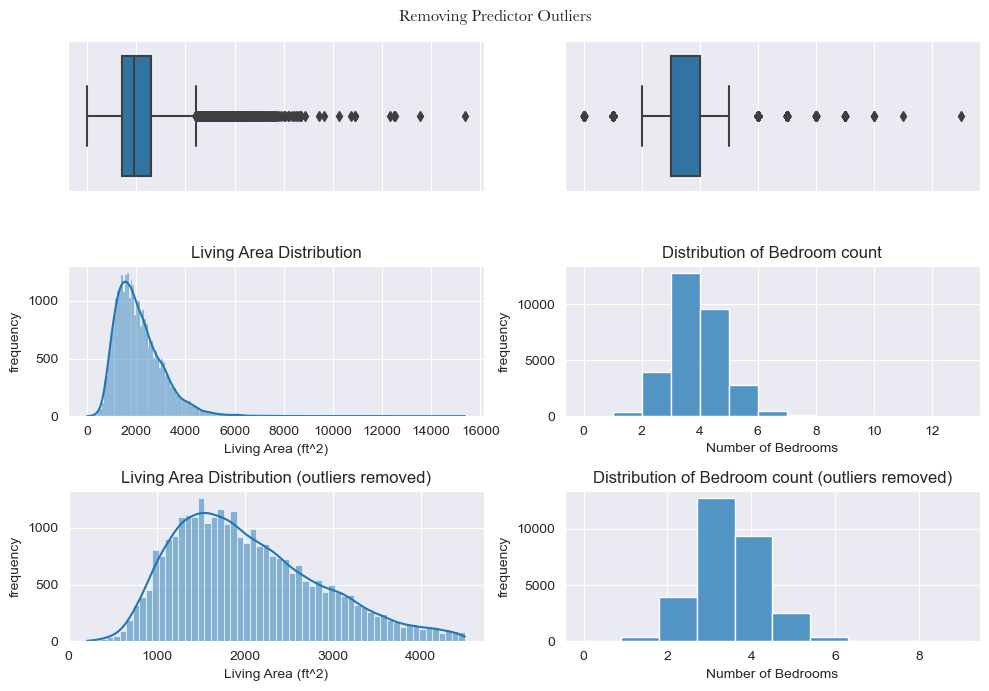

In [77]:
outlier_features = ['sqft_living', 'bedrooms']
outlier_df = numeric_df[outlier_features]
# remove outliers from bedroom, sqft_living
outlier_df = outlier_df.loc[df['bedrooms'] < 10]  
outlier_df = outlier_df.loc[(df['sqft_living'] <= 4500) & (df['sqft_living'] > 200)]  

sns.set_style('darkgrid')

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,7))

fig.suptitle('Removing Predictor Outliers', fontfamily='Baskerville')
sns.boxplot(x='sqft_living', data=numeric_df, ax=ax[0][0])
ax[0][0].set_xticklabels([])
ax[0][0].set_xlabel('')
sns.boxplot(x='bedrooms', data=numeric_df, ax=ax[0][1])
ax[0][1].set_xticklabels([])
ax[0][1].set_xlabel('')

sns.histplot(x='sqft_living', data=numeric_df, kde=True, bins='auto', ax=ax[1][0])
ax[1][0].set_xlabel('Living Area (ft^2)')
ax[1][0].set_ylabel('frequency')
ax[1][0].set_title('Living Area Distribution')
sns.histplot(x='sqft_living', data=outlier_df, kde=True, bins='auto', ax=ax[2][0])
ax[2][0].set_xlabel('Living Area (ft^2)')
ax[2][0].set_ylabel('frequency')
ax[2][0].set_title('Living Area Distribution (outliers removed)')

sns.histplot(x='bedrooms', data=numeric_df,  bins=13, ax=ax[1][1])
ax[1][1].set_xlabel('Number of Bedrooms')
ax[1][1].set_ylabel('frequency')
ax[1][1].set_title('Distribution of Bedroom count')
sns.histplot(x='bedrooms', data=outlier_df,  bins=10, ax=ax[2][1])
ax[2][1].set_xlabel('Number of Bedrooms')
ax[2][1].set_ylabel('frequency')
ax[2][1].set_title('Distribution of Bedroom count (outliers removed)')

plt.tight_layout()

# plt.savefig('imgs/feature_outliers.png')
plt.show()

In [ ]:
# remove price outliers
df = df.loc[(df['price'] > 78000) & (df['price'] < 7000000)]



In [ ]:
# remove outliers from bedroom, sqft_living
df = df.loc[df['bedrooms'] <= 10]  
df = df.loc[(df['sqft_living'] <= 8000) & (df['sqft_living'] > 400)]  


# Train Test Split

In [ ]:
# numeric Train test split (.75 train, .25 test)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='price'), df[['price']], test_size=.25, random_state=42)

# Helper Functions

In [78]:
# OLS
def get_train_score(xtrain, ytrain):
    lr = lm.LinearRegression()
    lr.fit(xtrain, ytrain)
    return lr.score(xtrain, ytrain)

def get_adjusted_train_score(xtrain, ytrain):
    # test R-Squared
    R2 = get_train_score(xtrain,ytrain)
    # number of observations in test data
    n = xtrain.shape[0]
    # number of features in test data (including constant)
    k = xtrain.shape[1] + 1
    return 1 - ( (1-R2) * ( (n-1)/(n-k-1 ) ) )

def get_test_score(xtrain, ytrain, xtest, ytest):
    lr = lm.LinearRegression()
    lr.fit(xtrain, ytrain)
    return lr.score(xtest, ytest)

# Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
def get_adjusted_test_score(xtrain, ytrain, xtest, ytest):
    # test R-Squared
    R2 = get_test_score(xtrain,ytrain,xtest,ytest)
    # number of observations in test data
    n = xtest.shape[0]
    # number of features in test data (including constant)
    k = xtest.shape[1] + 1
    return 1 - ( (1-R2) * ( (n-1)/(n-k-1 ) ) )

def print_train_scores(xtrain, ytrain):
    print(f"         Train R2: {get_train_score(xtrain, ytrain)}")
    print(f"Train Adjusted R2: {get_train_score(xtrain, ytrain)}")

def print_test_scores(xtrain, ytrain, xtest, ytest):
    print(f"         Test R2: {get_test_score(xtrain, ytrain, xtest, ytest)}")
    print(f"Test Adjusted R2: {get_test_score(xtrain, ytrain, xtest, ytest)}")


# RIDGE
def get_train_score_ridge(xtrain, ytrain):
    rr = lm.Ridge()
    rr.fit(xtrain, ytrain)
    return rr.score(xtrain, ytrain)

def get_adjusted_train_score(xtrain, ytrain):
    # test R-Squared
    R2 = get_train_score_ridge(xtrain,ytrain)
    # number of observations in test data
    n = xtrain.shape[0]
    # number of features in test data (including constant)
    k = xtrain.shape[1] + 1
    return 1 - ( (1-R2) * ( (n-1)/(n-k-1 ) ) )

def get_test_score_ridge(xtrain, ytrain, xtest, ytest):
    rr = lm.Ridge()
    rr.fit(xtrain, ytrain)
    return rr.score(xtest, ytest)


def get_adjusted_test_score_ridge(xtrain, ytrain, xtest, ytest):
    # test R-Squared
    R2 = get_test_score(xtrain,ytrain,xtest,ytest)
    # number of observations in test data
    n = xtest.shape[0]
    # number of features in test data (including constant)
    k = xtest.shape[1] + 1
    return 1 - ( (1-R2) * ( (n-1)/(n-k-1 ) ) )

def print_train_scores_ridge(xtrain, ytrain):
    print(f"         Train R2: {get_train_score_ridge(xtrain, ytrain)}")
    print(f"Train Adjusted R2: {get_train_score_ridge(xtrain, ytrain)}")

def print_test_scores_ridge(xtrain, ytrain, xtest, ytest):
    print(f"         Test R2: {get_test_score_ridge(xtrain, ytrain, xtest, ytest)}")
    print(f"Test Adjusted R2: {get_test_score_ridge(xtrain, ytrain, xtest, ytest)}")







def scale_custom(xtrain, xtest, col_names):
    # normally scale regularly distributed columns
    scaler = StandardScaler()
    custom_xtrain = pd.DataFrame(data=scaler.fit_transform(xtrain.drop(columns=col_names)),
                                 index=xtrain.index,
                                 columns=[col for col in xtrain.columns if col not in col_names])
    custom_xtest = pd.DataFrame(data=scaler.transform(xtest.drop(columns=col_names)),
                                index=xtest.index,
                                columns=[col for col in xtest.columns if col not in col_names])

    # custom scale irregularly distributed columns
    bad_xtrain = xtrain[col_names]
    bad_xtest = xtest[col_names]
    for col in col_names:
        true_xtrain = bad_xtrain.loc[bad_xtrain[col] != 0][col]
        xtrain_true_mean = true_xtrain.mean()
        xtrain_true_std = true_xtrain.std()
        custom_xtrain[col] = bad_xtrain[col].apply(lambda x: 0 if x == 0 else (x - xtrain_true_mean) / xtrain_true_std)
        custom_xtest[col] = bad_xtest[col].apply(lambda x: 0 if x == 0 else (x - xtrain_true_mean) / xtrain_true_std)

    return (custom_xtrain, custom_xtest)
    
def powerset(col_names, num_cols_lower_bound):
    "powerset([1,2,3]) --> (1,2) (1,3) (2,3) (1,2,3)"
    s = list(col_names)
    return list(list(subset) for subset in chain.from_iterable(combinations(s, r) for r in range(len(s)+1)) if len(list(subset)) > num_cols_lower_bound)


# Model Pipeline

In [220]:
df = pd.read_csv('data/kc_house_data.csv', index_col=0) # (30155,25), 3 duplicated entries
# display(df.head())
# print("Deleted Duplicate Entries:")
# display(df.loc[df.duplicated(keep=False)])
df.drop_duplicates(inplace=True)
# numeric Train test split (.75 train, .25 test)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='price'), df[['price']], test_size=.25, random_state=42)

# remove price outliers
y_train = y_train.loc[(y_train['price'] > 78000) & (y_train['price'] < 7000000)]
X_train = X_train.loc[y_train.index]
y_test = y_test.loc[(y_test['price'] > 78000) & (y_test['price'] < 7000000)]
X_test = X_test.loc[y_test.index]

# remove outliers from bedroom, sqft_living
X_train = X_train.loc[X_train['bedrooms'] <= 10]  
X_train = X_train.loc[(X_train['sqft_living'] <= 8000) & (X_train['sqft_living'] > 400)]  
y_train = y_train.loc[X_train.index]

X_test = X_test.loc[X_test['bedrooms'] <= 10]  
X_test = X_test.loc[X_test['sqft_living'] <= 8000]  
X_test = X_test.loc[(X_test['sqft_living'] <= 8000) & (X_test['sqft_living'] > 400)]  
y_test = y_test.loc[X_test.index]

# Ordinal Encoding
oe_cols = ['view', 'condition', 'grade']
oe_orders = [['NONE','FAIR','AVERAGE','GOOD','EXCELLENT'],
             ['Poor','Fair','Average','Good','Very Good'],
             ['1 Cabin',
              '2 Substandard',
              '3 Poor',
              '4 Low',
              '5 Fair',
              '6 Low Average',
              '7 Average',
              '8 Good',
              '9 Better',
              '10 Very Good',
              '11 Excellent',
              '12 Luxury',
              '13 Mansion']]

for col, order in zip(oe_cols,oe_orders):
    oe = OrdinalEncoder([order]).fit(X_train[[col]])
    X_train[col] = oe.transform(X_train[[col]])
    X_test[col] = oe.transform(X_test[[col]])


# label Encoding
le_cols = ['waterfront','greenbelt', 'nuisance']

for col in le_cols:
    le = LabelEncoder().fit(X_train[[col]])
    X_train[col] = le.transform(X_train[[col]])
    X_test[col] = le.transform(X_test[[col]])


    
# setting up zipcode column
# King County Zipcodes
# https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033
ci_zips = ['98002 (Auburn)', '98092 (Auburn)', '98224 (Baring)', '98004 (Bellevue)', '98005 (Bellevue)', '98006 (Bellevue)', '98007 (Bellevue)', '98008 (Bellevue)', '98010 (Black Diamond)', '98011 (Bothell)', '98178 (Bryn Mawr-Skyway)', '98148 (Burien)', '98166 (Burien)', '98014 (Carnation)', '98077 (Cottage Lake)', '98042 (Covington)', '98198 (Des Moines)', '98019 (Duvall)', '98031 (East Hill-Meridian)', '98022 (Enumclaw)', '98058 (Fairwood)', '98024 (Fall City)', '98003 (Federal Way)', '98023 (Federal Way)', '98027 (Issaquah)', '98029 (Issaquah)', '98028 (Kenmore)', '98032 (Kent)', '98030 (Kent)', '98033 (Kirkland)', '98034 (Kirkland)', '98001 (Lakeland North)', '98038 (Maple Valley)', '98039 (Medina)', '98040 (Mercer Island)', '98045 (North Bend)', '98047 (Pacific)', '98050 (Preston)', '98051 (Ravensdale)', '98052 (Redmond)', '98055 (Renton)', '98056 (Renton)', '98057 (Renton)', '98059 (Renton)', '98074 (Sammamish)', '98075 (Sammamish)', '98188 (SeaTac)', '98199 (Seattle)', '98174 (Seattle)', '98154 (Seattle)', '98158 (Seattle)', '98164 (Seattle)', '98101 (Seattle)', '98102 (Seattle)', '98103 (Seattle)', '98104 (Seattle)', '98105 (Seattle)', '98106 (Seattle)', '98107 (Seattle)', '98108 (Seattle)', '98109 (Seattle)', '98112 (Seattle)', '98115 (Seattle)', '98116 (Seattle)', '98117 (Seattle)', '98118 (Seattle)', '98119 (Seattle)', '98121 (Seattle)', '98122 (Seattle)', '98125 (Seattle)', '98126 (Seattle)', '98133 (Seattle)', '98134 (Seattle)', '98136 (Seattle)', '98144 (Seattle)', '98155 (Shoreline)', '98177 (Shoreline)', '98288 (Skykomish)', '98065 (Snoqualmie)', '98168 (Tukwila)', '98053 (Union Hill-Novelty Hill)', '98195 (Univ Of Washington)', '98070 (Vashon)', '98146 (White Center)', '98072 (Woodinville)']
ci_zips = set([x.split()[0] for x in ci_zips])

X_train['zipcode'] = [address.split(',')[-2][-5:] for address in X_train['address']]
X_train['zipcode'] = X_train['zipcode'].apply(lambda x: x if x in ci_zips else np.nan)

X_test['zipcode'] = [address.split(',')[-2][-5:] for address in X_test['address']]
X_test['zipcode'] = X_test['zipcode'].apply(lambda x: x if x in ci_zips else np.nan)

# drop rows outside King county
old_idxs = set(X_train.index)
X_train.dropna(inplace=True)
y_train.drop(index= old_idxs - set(X_train.index), inplace=True)

old_idxs = set(X_test.index)
X_test.dropna(inplace=True)
y_test.drop(index= old_idxs - set(X_test.index), inplace=True)

# setting up streetname column
X_train['street_name'] = [address.split(',')[0] for address in X_train['address']]
X_test['street_name'] = [address.split(',')[0] for address in X_test['address']]

ohe_cols = ['zipcode']

ohe = OneHotEncoder(sparse = False, drop='first')
train_ohe_df = ohe.fit_transform(X_train[ohe_cols])
train_ohe_df = pd.DataFrame(train_ohe_df, columns = ohe.get_feature_names(), index = X_train.index)
train_ohe_df

test_ohe_df = ohe.transform(X_test[ohe_cols])
test_ohe_df = pd.DataFrame(test_ohe_df, columns = ohe.get_feature_names(), index = X_test.index)
# Regular Scaling
numeric_cols = ['bedrooms',
                'bathrooms',
                'sqft_living',
                'sqft_lot',
                'floors',
                'sqft_above',
                'yr_built',
                'sqft_basement',
                'sqft_garage',
                'sqft_patio',
                'yr_renovated'] + oe_cols

X_raw = X_train[numeric_cols]
poly = PolynomialFeatures(2, interaction_only=False, include_bias=False)
raw_poly = pd.DataFrame(data=poly.fit_transform(X_raw[numeric_cols]),
                          index=X_raw.index,
                          columns=poly.get_feature_names(numeric_cols))


# scaler = StandardScaler()
# X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
# X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# POLYNOIAL FEATURES
# numeric_cols = list(set(X_train.columns.to_list()) - set(['nuisance', 'greenbelt', 'waterfront']))
poly = PolynomialFeatures(2, interaction_only=False, include_bias=False)
train_poly = pd.DataFrame(data=poly.fit_transform(X_train[numeric_cols]),
                          index=X_train.index,
                          columns=poly.get_feature_names(numeric_cols))
test_poly = pd.DataFrame(data=poly.transform(X_test[numeric_cols]),
                          index=X_test.index,
                          columns=poly.get_feature_names(numeric_cols))


model_cols = ['nuisance', 'greenbelt', 'waterfront']

X_raw = pd.concat([X_train[model_cols], raw_poly], 1)
X_raw = pd.concat([X_raw, train_ohe_df], 1)

X_train = X_train[model_cols]
X_train = pd.concat([X_train, train_poly], 1)
X_train = pd.concat([X_train, train_ohe_df], 1)

X_test = X_test[model_cols]
X_test = pd.concat([X_test, test_poly], 1)
X_test = pd.concat([X_test, test_ohe_df], 1)

# sklearn
lr = lm.LinearRegression()
lr.fit(X_train,y_train)
print("Train R2:", get_train_score(X_train, y_train))
print("Train Adjusted R2:", get_adjusted_train_score(X_train, y_train))
print_test_scores(X_train, y_train, X_test, y_test)

# statsmodel
model = sm.OLS(y_train,sm.add_constant(X_train))
results = model.fit()

print("MSE:",metrics.mean_squared_error(y_test, lr.predict(X_test)))
print("RMSE:",metrics.mean_squared_error(y_test, lr.predict(X_test),squared=False) )
print("MAE:",metrics.mean_absolute_error(y_test, lr.predict(X_test)))
results.summary()

Train R2: 0.7668700175070629
Train Adjusted R2: 0.7643224296291735
         Test R2: 0.7768484621261601
Test Adjusted R2: 0.7768484621261601
MSE: 115255996280.7577
RMSE: 339493.7352599569
MAE: 206856.66190481055


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     365.2
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:06:20   Log-Likelihood:            -3.0829e+05
No. Observations:               21733   AIC:                         6.170e+05
Df Residuals:                   21538   BIC:                         6.185e+05
Df Model:                         194                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        1.13e+08   1.83e+07      6.167      0.000    7.71e+07    1.49e+08
nuisance                   -4.039e+04   6606.092     -6.114      0.000   -5.33e+04   -2.74e+04
greenbelt                   3.161e+04   1.53e+04      2.071      0.038    1699.805    6.15e+04
waterfront                  4.561e+05   2.35e+04     19.395      0.000     4.1e+05    5.02e+05
bedrooms                   -3.106e+05   3.06e+05     -1.014      0.311   -9.11e+05     2.9e+05
bathrooms                  -5.349e+05   4.62e+05     -1.157      0.247   -1.44e+06    3.71e+05
sqft_living                  492.5815   1053.933      0.467      0.640   -1573.205    2558.368
sqft_lot                       9.2021      5.425      1.696      0.090      -1.432      19.836
floors                      3.283e+06   6.94e+05      4.728      0.000    1.92e+06    4.64e+06
sqft_above                  -895.3557   1106.195     -0.809      0.418   -3063.579    1272.868
yr_built                   -1.166e+05   1.88e+04     -6.211      0.000   -1.53e+05   -7.98e+04
sqft_basement                762.2521    860.049      0.886      0.375    -923.508    2448.013
sqft_garage                -2285.4514   1305.981     -1.750      0.080   -4845.271     274.368
sqft_patio                 -7944.9898   1101.763     -7.211      0.000   -1.01e+04   -5785.453
yr_renovated               -3878.1979    872.146     -4.447      0.000   -5587.669   -2168.727
view                        7.642e+05   2.79e+05      2.740      0.006    2.17e+05    1.31e+06
condition                   8.858e+05   4.02e+05      2.204      0.028    9.81e+04    1.67e+06
grade                      -2.896e+05   3.43e+05     -0.843      0.399   -9.63e+05    3.83e+05
bedrooms^2                  -774.2504   2703.780     -0.286      0.775   -6073.859    4525.358
bedrooms bathrooms          1.157e+04   6070.386      1.905      0.057    -332.500    2.35e+04
bedrooms sqft_living         -33.4719     14.140     -2.367      0.018     -61.186      -5.757
bedrooms sqft_lot             -0.1209      0.059     -2.036      0.042      -0.237      -0.004
bedrooms floors             3095.3987   8660.078      0.357      0.721   -1.39e+04    2.01e+04
bedrooms sqft_above            1.3799     14.589      0.095      0.925     -27.216      29.976
bedrooms yr_built            191.0348    157.696      1.211      0.226    -118.060     500.130
bedrooms sqft_basement        10.6063     11.287      0.940      0.347     -11.516      32.729
bedrooms sqft_garage          -1.1828     15.942     -0.074      0.941     -32.431      30.066
bedrooms sqft_patio           66.2687     15.670      4.229      0.000      35.555      96.982
bedrooms yr_renovated         -6.4294      7.779     -0.827      0.409     -21.677       8.818
bedrooms view               9248.1857   403

### resid plot

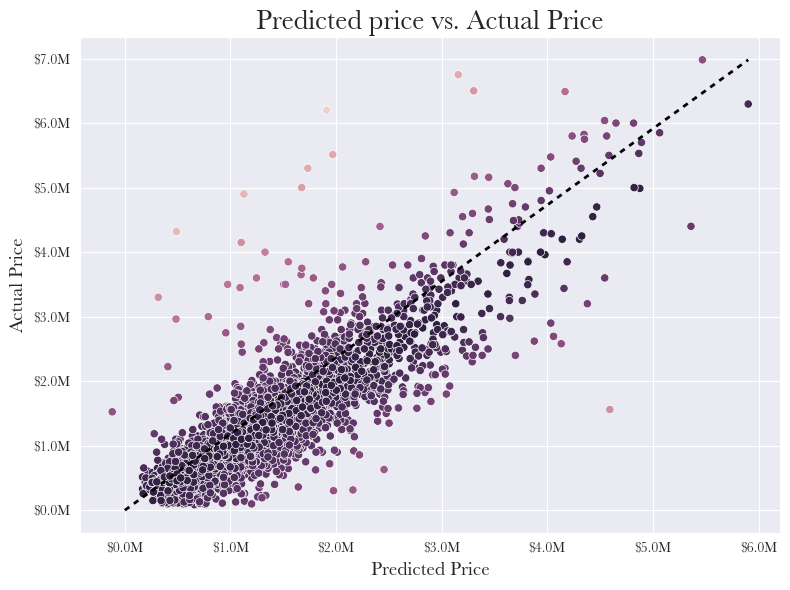

In [225]:
y_hat = lr.predict(X_test)

y_df = pd.DataFrame({'hat':y_hat.flatten()}, index=range(y_hat.shape[0]))
y_df['actual'] = y_test['price'].to_list()
y_df['resid'] = y_df['hat'] - y_df['actual']

fig, ax = plt.subplots(figsize=(8,6))
# sns.jointplot(x= 'actual',y= 'resid', data=y_df).set()
sns.scatterplot(x='hat',y='actual', data=y_df, hue=-np.abs(y_df['resid']))
ax.legend([],[], frameon=False)
plt.xlabel('Predicted Price', fontdict={'fontfamily':'Baskerville',
                                        'fontsize':14,
                                        'fontweight':'bold'})
plt.ylabel('Actual Price', fontdict={'fontfamily':'Baskerville',
                                     'fontsize':14,
                                     'fontweight':'bold'})
plt.title('Predicted price vs. Actual Price', fontdict={'fontfamily':'Baskerville',
                                                        'fontsize':20,
                                                        'fontweight':'bold'})
plt.xticks(fontfamily='Baskerville')
plt.yticks(fontfamily='Baskerville')
formatter = ticker.FuncFormatter(lambda x, pos: '$%1.1fM' % (x * 1e-6))
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)
plt.plot([0, y_df['hat'].max()], [0, y_df['actual'].max()], linewidth=2, color='black', dashes=[2,2])
plt.tight_layout()

# plt.savefig('imgs/final_resid.png')
plt.show()

### Top feature coefs_

In [222]:
feet_df = coefs.loc[['sqft_living' in f for f in coefs['feature']]]
feet_df['price_increment'].sum(), feet_df['b_se'].sum()

(-16.77057777252343, 480689.97731534013)

In [223]:
feet_df

,feature,abs_coef_,coef_,price_increment,b_se,pval
5,sqft_living,483.065599,483.065599,-1.749992,462286.013129,2.472631e-01
55,sqft_living grade,35.268056,35.268056,-1.625820,17.519600,3.715712e-01
19,bedrooms sqft_living,33.370456,-33.370456,-1.521104,6070.386045,5.675439e-02
46,sqft_living floors,27.350456,-27.350456,-1.514565,0.000194,9.454779e-01
54,sqft_living condition,15.627228,15.627228,-1.975184,10.827324,5.501750e-01
32,bathrooms sqft_living,6.614452,6.614452,-1.223860,5516.938258,2.554384e-07
53,sqft_living view,6.315451,6.315451,-0.303604,0.024460,2.617786e-01
48,sqft_living yr_built,0.305948,-0.305948,-2.235835,0.059569,6.150997e-01
51,sqft_living sqft_patio,0.176158,-0.176158,-0.651788,0.044930,4.786080e-03
50,sqft_living sqft_garage,0.126231,0.126231,-0.850245,0.046002,1.770499e-01


In [224]:
feat_names = X_train.columns.to_list()[:122]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    coefs = pd.DataFrame(columns=['feature','abs_coef_'])
    coefs['coef_'] = pd.Series(lr.coef_.flatten())
    coefs['abs_coef_'] = pd.Series(np.abs(lr.coef_.flatten()))
    coefs = coefs.sort_values(by='abs_coef_', ascending=False)
    coefs['feature'] = [(feat_names[i] if i < 122 else np.nan) for i in list(coefs['abs_coef_'].index)]
    coefs.drop(index=coefs.loc[coefs['feature'].isna()].index, inplace=True)
    # coefs['price_increment'] = [(coef - np.mean(X_train[coefs['feature'].iloc[i]]))/ np.std(X_train[coefs['feature'].iloc[i]]) for i, coef in enumerate(coefs['coef_'])]
    coefs['b_se'] = [results.bse[i] for i in coefs.index]
    coefs['pval'] = [results.pvalues.values[i] for i in coefs.index]
    
    display(coefs)

,feature,abs_coef_,coef_,b_se,pval
7,floors,3.281593e+06,3.281593e+06,5.425461e+00,8.988223e-02
15,condition,8.902434e+05,8.902434e+05,2.789644e+05,6.158089e-03
14,view,7.654771e+05,7.654771e+05,8.721460e+02,8.762300e-06
4,bathrooms,5.341674e+05,-5.341674e+05,3.063731e+05,3.106387e-01
2,waterfront,4.605404e+05,4.605404e+05,1.525925e+04,3.832685e-02
3,bedrooms,3.125329e+05,-3.125329e+05,2.351647e+04,4.359007e-83
16,grade,2.945735e+05,-2.945735e+05,4.019055e+05,2.752664e-02
9,yr_built,1.166843e+05,-1.166843e+05,1.106195e+03,4.182931e-01
0,nuisance,4.037189e+04,-4.037189e+04,1.832014e+07,7.103493e-10
118,view grade,3.757162e+04,3.757162e+04,4.447237e+03,9.314941e-01


### VIF check

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

# calculating VIF for each feature
vif_data["VIF"] = [VIF(X_train.values, i) for i in range(X_train.shape[1])]
vif_data.sort_values(by='VIF', ascending=False, inplace=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(vif_data)

KeyboardInterrupt: 

### correlations

In [ ]:
corr_df = X_train.corr().abs()
min_corr = .3
top_corrs = pd.DataFrame(columns=['corr','index','col'])
for index in corr_df.index:
    for col in corr_df.columns:
        if corr_df.loc[index,col] > min_corr and corr_df.loc[index,col] != 1:
            top_corrs.loc[top_corrs.shape[0]+1] = [corr_df.loc[index,col], index, col]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    cor = top_corrs.sort_values(by='corr', ascending=False)
    display(cor.iloc[[i*2 for i in range(cor.shape[0]//2)]])
    display(top_corrs.groupby('index').count().sort_values(by='col', ascending=False))
    display(top_corrs.groupby('index').mean().sort_values(by='corr', ascending=False))

,corr,index,col
31,0.883045,sqft_above,sqft_living
15,0.775412,sqft_living,bathrooms
61,0.741400,grade,sqft_living
36,0.722444,sqft_above,grade
9,0.678796,bathrooms,sqft_above
60,0.653208,grade,bathrooms
2,0.628351,bedrooms,sqft_living
1,0.595202,bedrooms,bathrooms
34,0.554329,sqft_above,sqft_garage
29,0.535362,sqft_above,bedrooms


,corr,col
index,,
sqft_living,9,9
grade,8,8
sqft_above,8,8
bathrooms,8,8
yr_built,8,8
sqft_garage,6,6
floors,5,5
bedrooms,5,5
sqft_patio,4,4


,corr
index,
sqft_above,0.579672
sqft_living,0.551300
bathrooms,0.548666
grade,0.540655
x0_Gas,0.500221
bedrooms,0.490857
sqft_garage,0.473040
floors,0.461176
view,0.425773


## fit model to log(price)

In [ ]:
# sklearn
lr = lm.LinearRegression()
lr.fit(X_train,np.log(y_train))
print("Train R2:", get_train_score(X_train, np.log(y_train)))
print("Train Adjusted R2:", get_adjusted_train_score(X_train, np.log(y_train)))
print_test_scores(X_train, np.log(y_train), X_test, np.log(y_test))

# statsmodel
model = sm.OLS(np.log(y_train),sm.add_constant(X_train))
results = model.fit()
results.summary()

Train R2: 0.7400305207072368
Train Adjusted R2: 0.7372025187835207
         Test R2: 0.7583375376986324
Test Adjusted R2: 0.7583375376986324


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     311.2
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:52:41   Log-Likelihood:                -3494.9
No. Observations:               21733   AIC:                             7386.
Df Residuals:                   21535   BIC:                             8967.
Df Model:                         197                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8944      0.057    225.232      0.000      12.782      13.007
nuisance      -0.0392      0.005     -7.321      0.000      -0.050      -0.029
greenbelt      0.0400      0.012      3.233      0.001       0.016       0.064
waterfront     0.2097      0.019     10.990      0.000       0.172       0.247
x0             0.0005      0.003      0.148      0.882      -0.006       0.007
x1             0.0212      0.004      5.325      0.000       0.013       0.029
x2             0.0925      0.018      5.083      0.000       0.057       0.128
x3             0.0675      0.005     14.513      0.000       0.058       0.077
x4            -0.0215      0.004     -5.203      0.000      -0.030      -0.013
x5             0.1111      0.017      6.588      0.000       0.078       0.144
x6             0.0335      0.005      7.214      0.000       0.024       0.043
x7             0.0117      0.008      1.465      0.143      -0.004       0.027
x8             0.0199      0.003      5.929      0.000       0.013       0.026
x9             0.0172      0.003      5.775      0.000       0.011       0.023
x10           -1.6471      0.239     -6.903      0.000      -2.115      -1.179
x11            0.0147      0.006      2.418      0.016       0.003       0.027
x12            0.0511      0.003     15.873      0.000       0.045       0.057
x13            0.0856      0.004     21.381      0.000       0.078       0.093
x0^2           0.0014      0.002      0.687      0.492      -0.003       0.005
x0 x1          0.0096      0.004      2.308      0.021       0.001       0.018
x0 x2         -0.0259      0.010     -2.506      0.012      -0.046      -0.006
x0 x3          0.0042      0.003      1.446      0.148      -0.001       0.010
x0 x4          0.0019      0.004      0.518      0.604      -0.005       0.009
x0 x5          0.0015      0.010      0.152      0.879      -0.018       0.021
x0 x6          0.0079      0.004      2.016      0.044       0.000       0.016
x0 x7          0.0073      0.005      1.437      0.151      -0.003       0.017
x0 x8         -0.0011      0.004     -0.323      0.746      -0.008       0.006
x0 x9          0.0028      0.003      0.954      0.340      -0.003       0.009
x0 x10         0.0005      0.003      0.181      0.857      -0.005       0.005
x0 x11         0.0013      0.003      0.491      0.624      -0.004       0.007
x0 x12         0.0033      0.003      1.110      0.267      -0.003       0.009
x0 x13         0.0058      0.004      1.344      0.179      -0.003       0.014
x1^2          -0.0131      0.003     -3.815      0.000      -0.020      -0.006
x1 x2         -0.0015      0.013     -0.113      0.910      -0.028       0.025
x1 x3         -0.0165      0.005     -3.634      0.000      -0.025      -0.008
x1 x4      -1.589e-05      0.005     -0.003      0.997      -0.010       0.010
x1

### Mean Error log(target)

In [ ]:
print("MSE:",metrics.mean_squared_error(y_test, np.exp(lr.predict(X_test))))
print("RMSE:",metrics.mean_squared_error(y_test, np.exp(lr.predict(X_test)),squared=False) )
print("MAE:",metrics.mean_absolute_error(y_test, np.exp(lr.predict(X_test))))

MSE: 115754719934.45175
RMSE: 340227.45323452627
MAE: 190281.8081081853


### resid plot

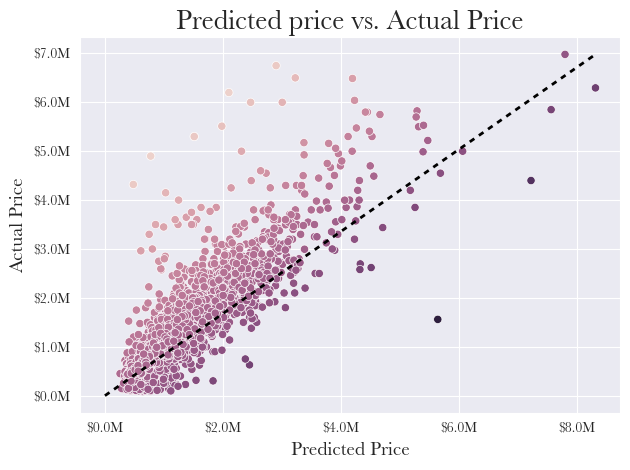

In [ ]:
y_hat = np.exp(lr.predict(X_test))

y_df = pd.DataFrame({'hat':y_hat.flatten()}, index=range(y_hat.shape[0]))
y_df['actual'] = y_test['price'].to_list()
y_df['resid'] = y_df['hat'] - y_df['actual']

fig, ax = plt.subplots()
sns.scatterplot(x='hat',y='actual', data=y_df, hue='resid')
ax.legend([],[], frameon=False)
plt.xlabel('Predicted Price', fontdict={'fontfamily':'Baskerville',
                                        'fontsize':14,
                                        'fontweight':'bold'})
plt.ylabel('Actual Price', fontdict={'fontfamily':'Baskerville',
                                     'fontsize':14,
                                     'fontweight':'bold'})
plt.title('Predicted price vs. Actual Price', fontdict={'fontfamily':'Baskerville',
                                                        'fontsize':20,
                                                        'fontweight':'bold'})
plt.xticks(fontfamily='Baskerville')
plt.yticks(fontfamily='Baskerville')
formatter = ticker.FuncFormatter(lambda x, pos: '$%1.1fM' % (x * 1e-6))
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)
plt.plot([0, y_df['hat'].max()], [0, y_df['actual'].max()], linewidth=2, color='black', dashes=[2,2])
plt.tight_layout()


plt.show()

### Top feature coefs_

In [ ]:
feat_names = X_train.columns.to_list()[:122]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    coefs = pd.DataFrame(columns=['feature','abs_coef_'])
    coefs['abs_coef_'] = pd.Series(np.abs(lr.coef_.flatten())).sort_values(ascending=False)
    coefs['feature'] = [(feat_names[i] if i < 122 else np.nan) for i in list(coefs['abs_coef_'].index)]
    display(coefs)

,feature,abs_coef_
145,NaN,2.751387e+06
124,NaN,1.857511e+06
13,yr_renovated,1.725400e+06
146,NaN,1.209822e+06
142,NaN,1.144942e+06
125,NaN,1.132487e+06
173,NaN,9.945925e+05
150,NaN,8.519096e+05
172,NaN,8.180591e+05
128,NaN,8.157879e+05


### VIF check

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

# calculating VIF for each feature
vif_data["VIF"] = [VIF(X_train.values, i) for i in range(X_train.shape[1])]
vif_data.sort_values(by='VIF', ascending=False, inplace=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(vif_data)

,feature,VIF
47,x2 x5,2660.165899
44,x2^2,1140.120871
112,x10^2,1049.967765
13,x10,1004.329180
77,x5^2,655.162698
49,x2 x7,397.483843
32,x1 x2,243.081792
55,x2 x13,194.412130
35,x1 x5,176.235235
85,x5 x13,153.382407


### correlations

In [ ]:
corr_df = X_train.corr().abs()
min_corr = .3
top_corrs = pd.DataFrame(columns=['corr','index','col'])
for index in corr_df.index:
    for col in corr_df.columns:
        if corr_df.loc[index,col] > min_corr and corr_df.loc[index,col] != 1:
            top_corrs.loc[top_corrs.shape[0]+1] = [corr_df.loc[index,col], index, col]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    cor = top_corrs.sort_values(by='corr', ascending=False)
    display(cor.iloc[[i*2 for i in range(cor.shape[0]//2)]])
    display(top_corrs.groupby('index').count().sort_values(by='col', ascending=False))
    display(top_corrs.groupby('index').mean().sort_values(by='corr', ascending=False))

,corr,index,col
31,0.883045,sqft_above,sqft_living
15,0.775412,sqft_living,bathrooms
61,0.741400,grade,sqft_living
36,0.722444,sqft_above,grade
9,0.678796,bathrooms,sqft_above
60,0.653208,grade,bathrooms
2,0.628351,bedrooms,sqft_living
1,0.595202,bedrooms,bathrooms
34,0.554329,sqft_above,sqft_garage
29,0.535362,sqft_above,bedrooms


,corr,col
index,,
sqft_living,9,9
grade,8,8
sqft_above,8,8
bathrooms,8,8
yr_built,8,8
sqft_garage,6,6
floors,5,5
bedrooms,5,5
sqft_patio,4,4


,corr
index,
sqft_above,0.579672
sqft_living,0.551300
bathrooms,0.548666
grade,0.540655
x0_Gas,0.500221
bedrooms,0.490857
sqft_garage,0.473040
floors,0.461176
view,0.425773
